In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
%matplotlib inline


Using Theano backend.


In [2]:
train_path = 'cats-and-dogs/train'
valid_path = 'cats-and-dogs/valid'
test_path = 'cats-and-dogs/test'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224),classes=['dogs','cats'],batch_size=4)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224),classes=['dogs','cats'],batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224),classes=['dogs','cats'], batch_size=10)


Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [4]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
imgs, labels = next(train_batches)

'tf'

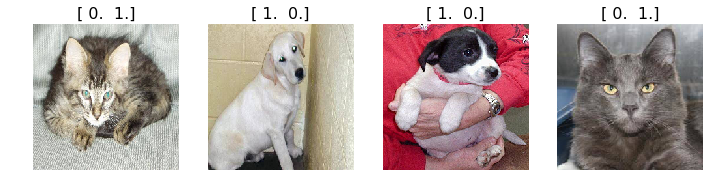

In [62]:
plots(imgs, titles=labels)
keras.backend.image_dim_ordering()

In [7]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape=(224,224,3)),
    Flatten(),
    Dense(2,activation='softmax')
])

/home/sgrosu/anaconda3/lib/python3.6/site-packages/nose_parameterized/__init__.py:7: UserWarning: The 'nose-parameterized' package has been renamed 'parameterized'. For the two step migration instructions, see: https://github.com/wolever/parameterized#migrating-from-nose-parameterized-to-parameterized (set NOSE_PARAMETERIZED_NO_WARN=1 to suppress this warning)
  "The 'nose-parameterized' package has been renamed 'parameterized'. "
Using cuDNN version 5110 on context None
Mapped name None to device cuda: GeForce GTX 1060 3GB (0000:01:00.0)


In [8]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.fit_generator(train_batches,steps_per_epoch=200,validation_data=valid_batches,validation_steps=4,epochs=5,verbose=2)

Epoch 1/5
17s - loss: 8.3210 - acc: 0.4838 - val_loss: 6.0443 - val_acc: 0.6250
Epoch 2/5
16s - loss: 8.5627 - acc: 0.4688 - val_loss: 7.0517 - val_acc: 0.5625
Epoch 3/5
17s - loss: 8.0993 - acc: 0.4975 - val_loss: 11.0812 - val_acc: 0.3125
Epoch 4/5
38s - loss: 7.6964 - acc: 0.5225 - val_loss: 3.0221 - val_acc: 0.8125
Epoch 5/5
33s - loss: 7.7165 - acc: 0.5212 - val_loss: 7.0517 - val_acc: 0.5625


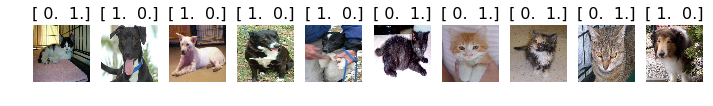

In [10]:
from utils import plots
#print(len(next(test_batches)))
test_imgs, test_labels = next(test_batches)
plots(test_imgs,titles = test_labels)

In [11]:
test_labels = test_labels[:,0]
test_labels

array([ 0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.], dtype=float32)

In [12]:
predictions = model.predict_generator(test_batches,steps=1,verbose=0)
predictions

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]], dtype=float32)

In [13]:
cm = confusion_matrix(test_labels,predictions[:,0])

[[5 0]
 [5 0]]


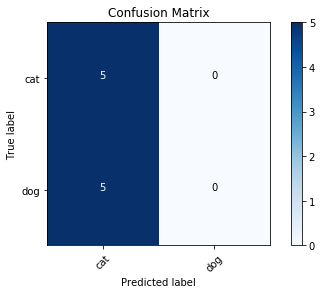

In [14]:
from utils import plot_confusion_matrix
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm,cm_plot_labels, title='Confusion Matrix')

In [15]:
# Build a finetuned vgg16 model
vgg16_model = keras.applications.vgg16.VGG16()

In [16]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [17]:
type(vgg16_model)

keras.engine.training.Model

In [18]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [19]:
model.layers.pop()

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [21]:
for layer in model.layers:
    layer.trainable = False

In [22]:
model.add(Dense(2,activation='softmax'))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [24]:
# Train the finetuned VGG16 model
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.fit_generator(train_batches,steps_per_epoch=200,validation_data=valid_batches,validation_steps=4,epochs = 5,verbose=2)

Epoch 1/5
161s - loss: 0.6520 - acc: 0.8850 - val_loss: 0.6226 - val_acc: 1.0000
Epoch 2/5
161s - loss: 0.6228 - acc: 0.9400 - val_loss: 0.6162 - val_acc: 0.9375
Epoch 3/5
161s - loss: 0.5995 - acc: 0.9512 - val_loss: 0.5776 - val_acc: 1.0000
Epoch 4/5
162s - loss: 0.5765 - acc: 0.9650 - val_loss: 0.5738 - val_acc: 0.9375
Epoch 5/5
163s - loss: 0.5534 - acc: 0.9750 - val_loss: 0.5784 - val_acc: 0.8750


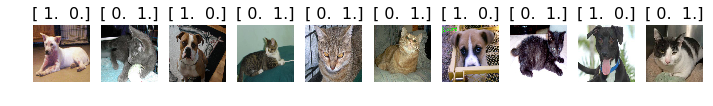

In [57]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [58]:
test_labels = test_labels[:,0]
test_labels

array([ 1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.], dtype=float32)

In [59]:
predictions = model.predict_generator(test_batches,steps=1,verbose=0)
#np.round(predictions[:,0])
#np.unique(np.round(predictions[:, 0].ravel()))

[[2 4]
 [2 2]]


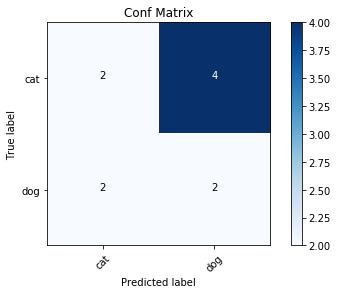

In [60]:
cm = confusion_matrix(test_labels,np.round(predictions[:,0]))
#np.unique(test_labels)
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm,cm_plot_labels, title = 'Conf Matrix')

In [56]:
model.save('vgg16_model.h5')